In [16]:
import pandas as pd
import numpy as np
from IPython.display import display


df = pd.read_csv('data.csv', parse_dates=['timestamp'])
# df['per_meter_time'] = df.meter_time / df.meter_num
df['ex_meter_time'] = df.control + df.ta + df['agg']

# display(df.style)
df.head()
# print( + df.control)
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}

In [17]:
avg_df_midx = df.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)

In [18]:
display(avg_df_midx.index)

MultiIndex([(  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 60),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 60),
            ...
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 20),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 30),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 40),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 50),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime',

In [19]:
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime')].index)
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime'), 'meter_time'])

Int64Index([20, 30, 40, 50, 60], dtype='int64', name='meter_num')

meter_num
20    3.596670e+08
30    5.401054e+08
40    7.223274e+08
50    9.016852e+08
60    1.111270e+09
Name: meter_time, dtype: float64

In [20]:
exp_name = avg_df_midx.index.get_level_values(1).drop_duplicates()
display(exp_name)

Index(['boudia', 'cir', 'homo', 'ni'], dtype='object', name='name')

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.formatter.use_mathtext"] = True
markers = ['o', 'v', 's', 'd', 'X']
color = ['b', 'r', 'g', 'y']

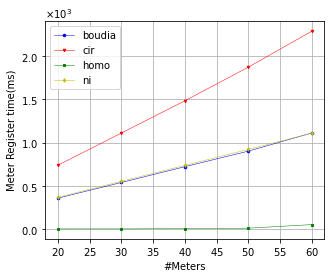

In [22]:
# 注册阶段 电表总时间
reg_func = [ 'oneTimeMeterRegTime' , 'meterRegTime_3', 'meterRegTime', 'oneTimeMeterRegTime']

for i, e, f in zip(range(0,4), exp_name, reg_func):
    x = avg_df_midx.loc[('raspberrypi', e, f)].index
    y = avg_df_midx.loc[('raspberrypi', e, f), 'meter_time']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Meter Register time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_reg.pdf')
plt.show()

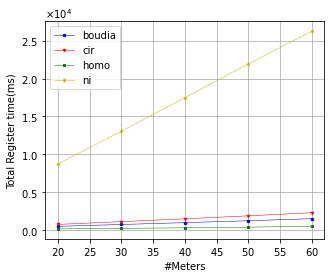

In [23]:
# 注册阶段 总时间
for i, e, f in zip(range(0,4), exp_name, reg_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Total Register time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_reg.pdf')

plt.show()

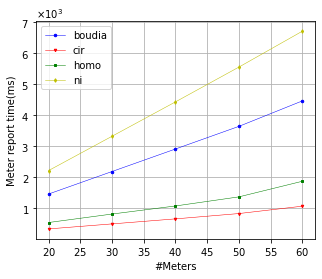

In [24]:
# 聚合阶段 电表
rep_func = ['oneTimeMeterRepTime', 'meterRepTime_3', 'oneTimeMeterRepTime', 'oneTimeMeterRepTime']
for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('raspberrypi', e, f)]
    x = host_df.index
    y = host_df.meter_time/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Meter report time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_report.pdf')

plt.show()
plt.show()

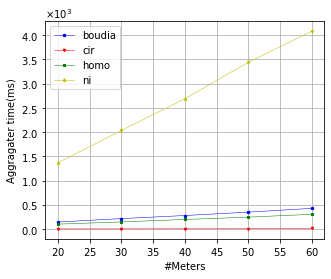

In [25]:
# 聚合阶段 聚合器

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df['agg']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Aggragater time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/agg_report.pdf')

plt.show()
plt.show()

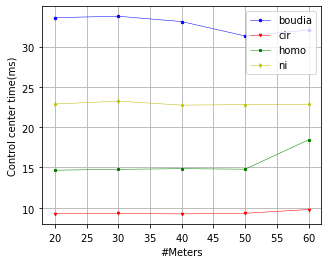

In [26]:
# 聚合阶段 控制中心

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df.control/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Control center time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/control_report.pdf')

plt.show()
plt.show()

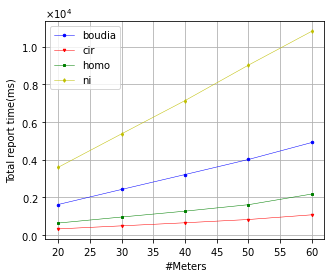

In [27]:
# 聚合阶段 总时间

for i, e, f in zip(range(0,4), exp_name, rep_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=e)

plt.xlabel('#Meters')
plt.ylabel('Total report time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_report.pdf')
plt.show()


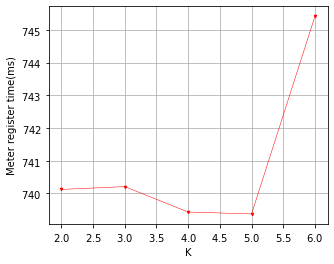

In [28]:
# k anonymous register

k = [k for k in range(2,7)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[1], color=color[1])

plt.xlabel('K')
plt.ylabel('Meter register time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
# plt.legend()
plt.savefig('figs/meter_k_register.pdf')
plt.show()

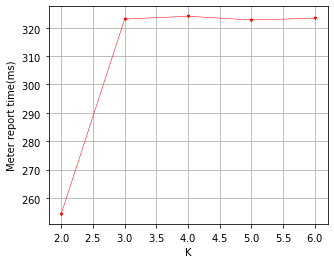

In [29]:
# k anonymous report
k = [k for k in range(2,7)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[1], color=color[1])

plt.xlabel('K')
plt.ylabel('Meter report time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
# plt.legend()
plt.savefig('figs/meter_k_report.pdf')
plt.show()

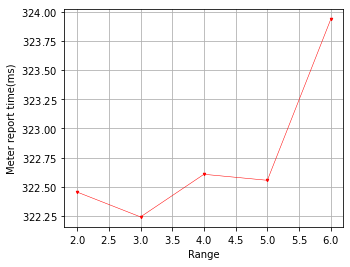

In [30]:
# k anonymous range
r = [r for r in range(2,7)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, 7)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[1], color=color[1])

plt.xlabel('Range')
plt.ylabel('Meter report time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
# plt.legend()
plt.savefig('figs/meter_range_register.pdf')
plt.show()